In [12]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Set plotting style
sns.set(style="whitegrid")



In [13]:
df = pd.read_csv("../data/benin-malanville.csv") 
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [15]:
# Summary stats
df.describe()

# Missing values
missing = df.isna().sum()
print("Columns with >5% missing values:")
print(missing[missing / len(df) > 0.05])


Columns with >5% missing values:
Comments    525600
dtype: int64


In [16]:
cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

# Compute Z-scores
z_scores = df[cols].apply(zscore)

# Flag rows with any |Z|>3
outliers = (z_scores.abs() > 3).any(axis=1)
print(f"Number of outlier rows: {outliers.sum()}")


Number of outlier rows: 7740


In [17]:
# Replace outliers with NaN
df.loc[outliers, cols] = np.nan

# Impute median for key columns
for col in cols:
    df[col].fillna(df[col].median(), inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_2468\1519499691.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2468\1519499691.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [18]:
# Replace outliers with NaN
df.loc[outliers, cols] = np.nan

# Impute median for key columns
for col in cols:
    df[col] = df[col].fillna(df[col].median())


In [19]:
df.to_csv("../data/benin_clean.csv", index=False)  # Don't commit this file


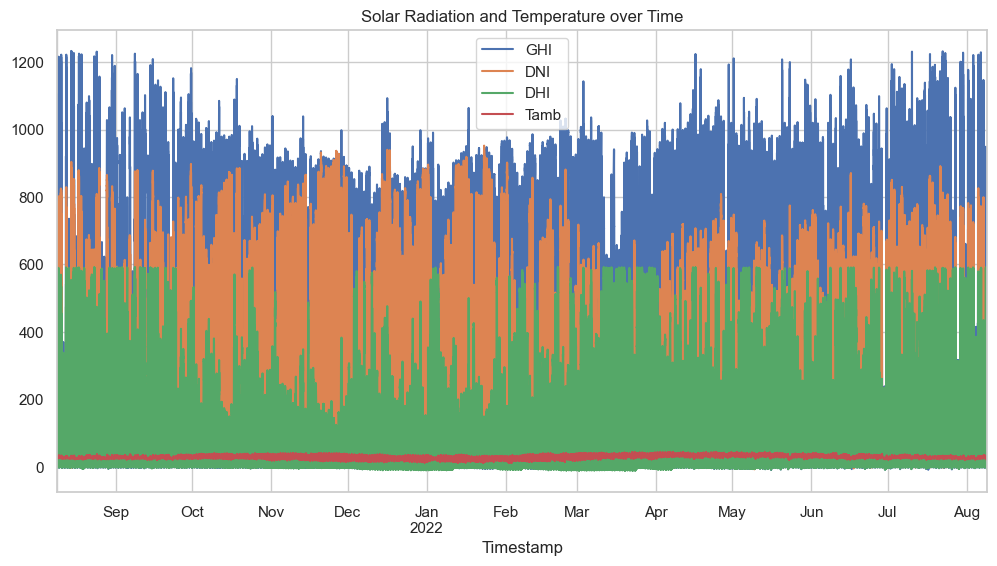

In [20]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Plot GHI, DNI, DHI, Tamb
df[['GHI','DNI','DHI','Tamb']].plot(figsize=(12,6))
plt.title("Solar Radiation and Temperature over Time")
plt.show()


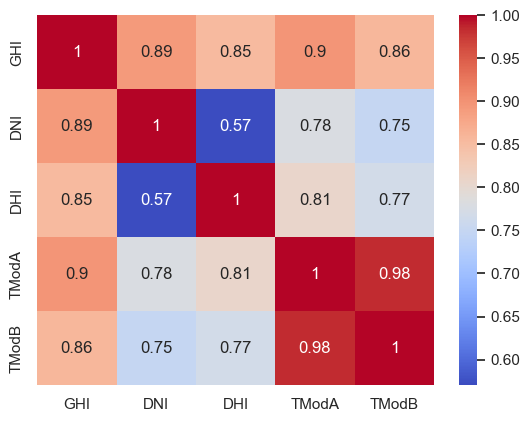

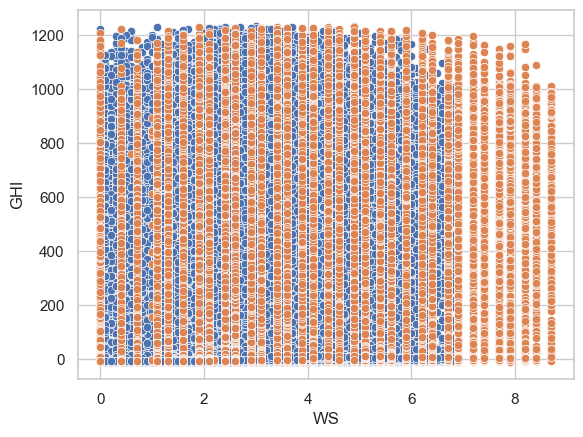

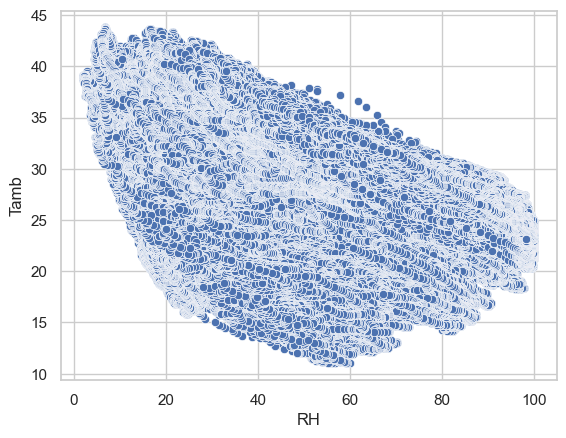

In [21]:
# Correlation heatmap
sns.heatmap(df[['GHI','DNI','DHI','TModA','TModB']].corr(), annot=True, cmap='coolwarm')
plt.show()

# Scatter: Wind vs GHI
sns.scatterplot(x='WS', y='GHI', data=df)
sns.scatterplot(x='WSgust', y='GHI', data=df)
plt.show()

# RH vs Temperature
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.show()


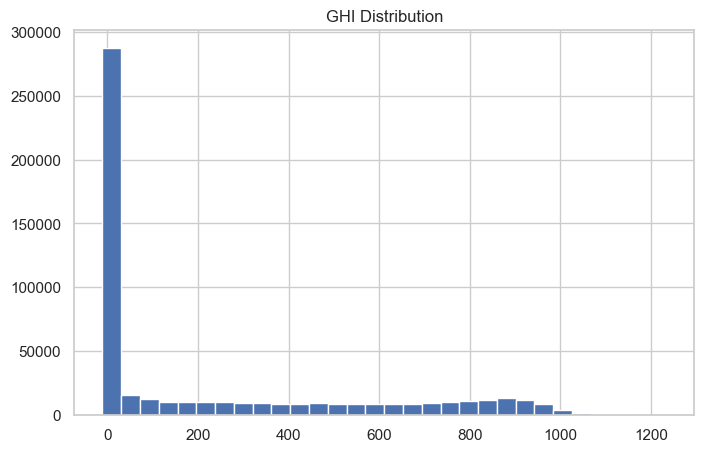

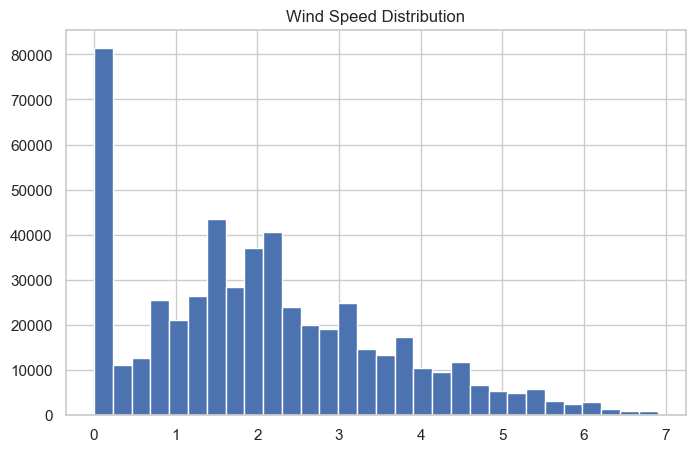

In [22]:
# Histogram for GHI
df['GHI'].hist(bins=30, figsize=(8,5))
plt.title("GHI Distribution")
plt.show()

# Histogram for Wind Speed
df['WS'].hist(bins=30, figsize=(8,5))
plt.title("Wind Speed Distribution")
plt.show()


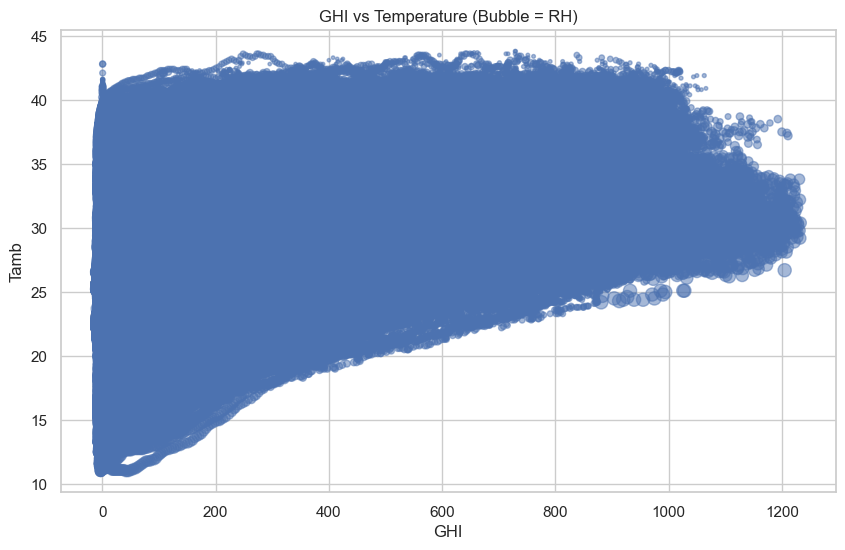

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5)
plt.xlabel("GHI")
plt.ylabel("Tamb")
plt.title("GHI vs Temperature (Bubble = RH)")
plt.show()
